# General requirements for the assignment

- Make appropriate comments to your code
- Use Markdown cells to provide your answers (when applicable)
- Add your code when there is the comment "YOUR CODE HERE".
- Stick to Pep8 standard as much as possible for your coding
- Tag the commit as *Final submission of Assignment 3*
- Submit through GitHub
- Provide your GitHub url to the Ipython notebook as the submisison for Brightspace assignment 3
- Post (interesting) errors in the course Github's issue page

# Assignment Intro

In this assignment, you will be asked to make some visualisations on the dataset that you worked with in the previous assignments.

### DEADLINE FOR THIS ASSIGNMENT IS 15 OCTOBER 2021 BEFORE 23:59

<hr />

## Import libraries
Update this list as you go along the assigment

In [49]:
# YOUR CODE HERE
# import libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import geopandas as gpd

## Activities changes

Use the dataset that you have been working on in the previous assignments. Pick either a city or a province, then recreate the diagram for one of the activities, similar to those that are shown in [Google mobility reports](https://www.gstatic.com/covid19/mobility/2021-09-28_AW_Mobility_Report_en.pdf) or as below.

<img src="Images/Transit_changes.png" alt="drawing" width="600"/>

### Remarks:
- Create readable graphs by providing appropriate ticks, labels, titles, colorbars, legends
- [Hint] A possible [function](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.fill_between.html#matplotlib.axes.Axes.fill_between) to fill areas between lines
- [Optional] If you are ambitous, you can use subplots to also include the left part of the figure, which shows the percentages as below
 <img src="Images/Transit_changes_text.png" alt="drawing" width="200"/>

In [58]:
# YOUR CODE HERE
df_2020 = pd.read_csv('http://mirrors-dev.citg.tudelft.nl:8083/google-mobility-data/2020/NL')
df_2021 = pd.read_csv('http://mirrors-dev.citg.tudelft.nl:8083/google-mobility-data/2021/NL')
df = pd.concat([df_2020, df_2021])


matrix = pd.isna(df) #get the True&False matrix
df_province = df[(matrix['country_region']==False)&(matrix['sub_region_1']== False)&(matrix['sub_region_2']== True)]
df_province = df_province.reset_index(drop = True)

# here choose Utrecht as the province and grocery_and_pharmacy_percent_change_from_baseline as the activity
df_Utrecht = df_province[df_province['sub_region_1'] == 'Utrecht']
df_Utrecht_act = df_Utrecht[['grocery_and_pharmacy_percent_change_from_baseline', 'date']]
df_Utrecht_act = df_Utrecht_act.reset_index(drop = True)
df_Utrecht_act


,grocery_and_pharmacy_percent_change_from_baseline,date
0,0.0,2020-02-15
1,-10.0,2020-02-16
2,-1.0,2020-02-17
3,3.0,2020-02-18
4,-1.0,2020-02-19
...,...,...
560,-1.0,2021-08-28
561,2.0,2021-08-29
562,8.0,2021-08-30
563,11.0,2021-08-31


<ipython-input-59-6f254904c29c>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['-60%','-40%','-20%','0','+20%','+40%','+60%'],fontsize = 15)


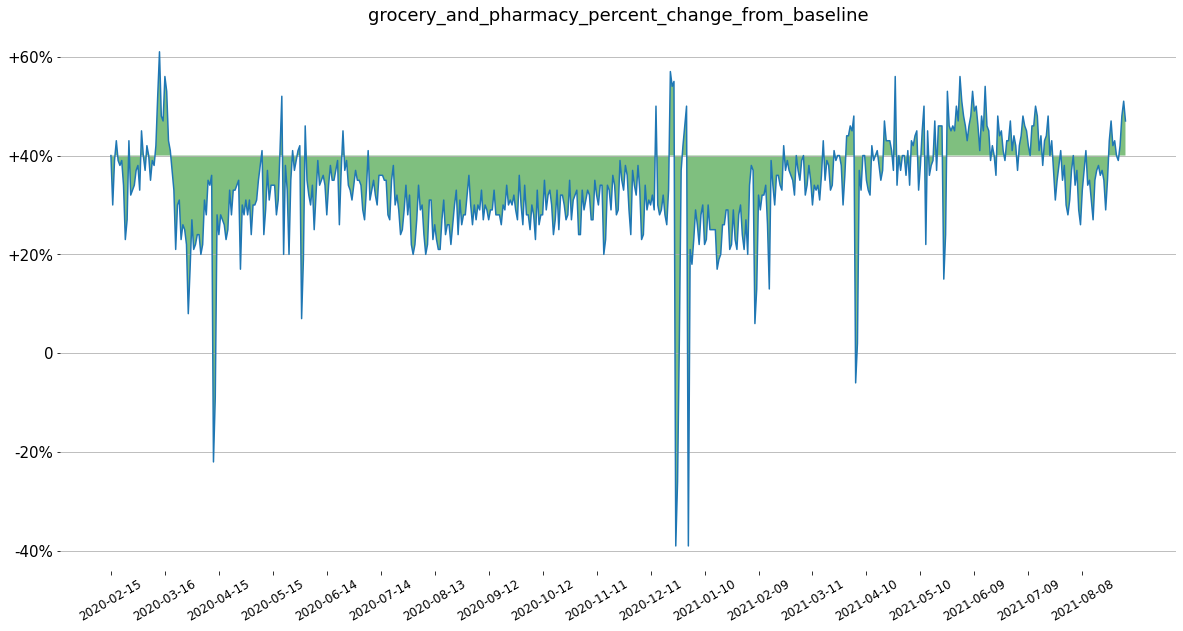

In [59]:
# define the x value and y value
activity = 'grocery_and_pharmacy_percent_change_from_baseline'
x = df_Utrecht_act['date']
y = df_Utrecht_act[activity]

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x, y,linewidth=1.5)

#set four axises to be invisible 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.grid(axis = 'y')
plt.fill_between(x, 0, y, facecolor='green', alpha=0.5)

#set the format of both x and y axis
plt.xticks(range(0, df_Utrecht_act.shape[0], 30),rotation=30,fontsize = 12)
ax.set_yticklabels(['-60%','-40%','-20%','0','+20%','+40%','+60%'],fontsize = 15)
plt.title(activity,fontsize = 18)
plt.show()

## Multiple lines in the same plot

In the previous question, you created a figure for a single city/province. Now, include multiple cities or provinces in a single figure. This time, make the diagram interactive, such as being be to select/deselect particular cities/provinces.


### Remarks

- You donot need to fill areas between the lines for the multiple lines plot here
- [Hint] If you are to use plotly express, you can use `color` argument in [px.line](https://plotly.com/python-api-reference/generated/plotly.express.line)


In [61]:
# YOUR CODE HERE
import plotly.express as px
df_province.rename(columns={'sub_region_2':'province'},inplace=True)
px.line(df_province,x=df_province['date'],y=df_province['grocery_and_pharmacy_percent_change_from_baseline'],color=df_province['province'],)
    
    
    

ModuleNotFoundError: No module named 'plotly'

## Geospatial choropleth

Visualise the percentage changes from the baseline at either city-level or province-level in a geographical map for a chosen day.

[Hint] Here is an example of municipal boundaries of Netherlands. You can download the municipal boundaries of Netherlands from this [link](https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2017_gegeneraliseerd&outputFormat=json) and here is some [code](https://www.cbs.nl/en-gb/onze-diensten/open-data/statline-as-open-data/cartography) to read this file as well.

If you cannot find the boundary of your selected country. Feel free to use Netherlands data for this question.

DO NOT forget to label the appropriate axes for the visualisations

[Optional] Plot and animate for multiple days

In [62]:
# YOUR CODE HERE
df_day = df_province[df_province.date == '2021-08-29']   # choose a day
df_day = df_day[['sub_region_2', activity]]  # choose an activity 
